In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# prompt: import Most Streamed Spotify Songs 2024 csv file as dataframe
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# Install chardet if you don't have it
!pip install chardet

import chardet

with open('Most Streamed Spotify Songs 2024.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# Use the detected encoding
try:
    df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding=result['encoding'])
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")
    print(f"Detected encoding: {result['encoding']}")
    print("Trying other encodings...")

    # Try other common encodings if the first one fails
    encodings_to_try = ['latin-1', 'iso-8859-1', 'utf-16']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding=encoding)
            print(f"Successfully read with encoding: {encoding}")
            print(df.head())
            break
        except Exception as e:
            print(f"Failed with encoding {encoding}: {e}")
    else:
      print("Could not read the file with any of the tried encodings.")

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

In [ ]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

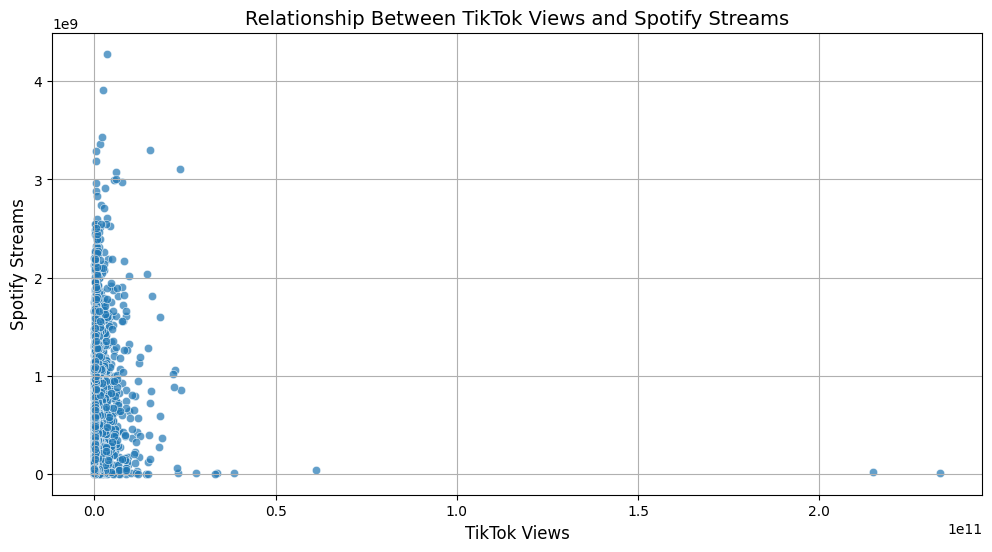

In [ ]:
# Convert relevant columns to numeric where applicable
for col in ['Spotify Streams', 'TikTok Posts', 'TikTok Views', 'Spotify Playlist Count', 'Spotify Playlist Reach']:
    df[col] = df[col].replace(',', '', regex=True).astype(float)

# Quantitative variables: Spotify Streams and TikTok Views
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TikTok Views', y='Spotify Streams', alpha=0.7)
plt.title('Relationship Between TikTok Views and Spotify Streams', fontsize=14)
plt.xlabel('TikTok Views', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.grid(True)
plt.show()

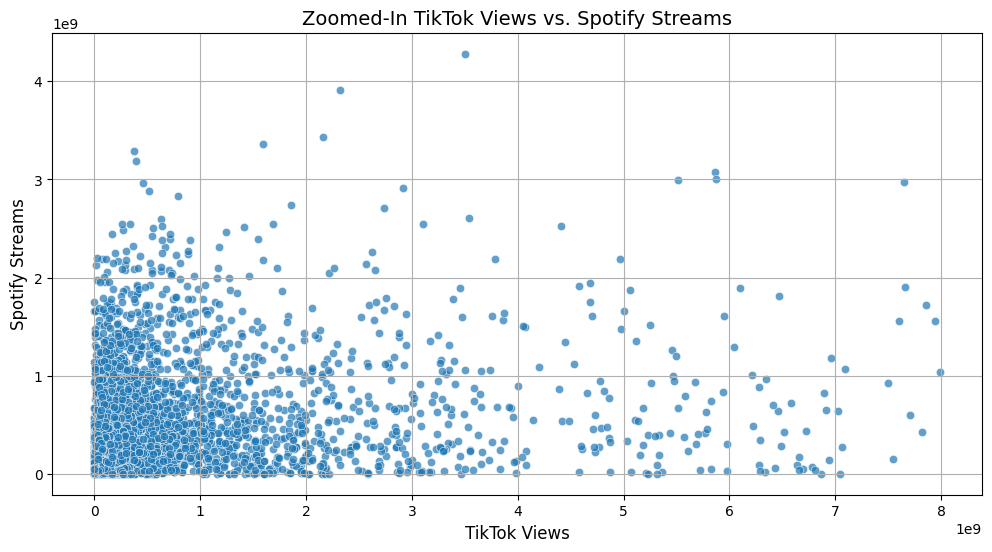

In [ ]:
# Zoom in on higher values
# Set thresholds for "high" values
tiktok_threshold = 8_000_000_000  # Example: TikTok Views < 8M
spotify_threshold = 10_000_000_000  # Example: Spotify Streams < 10M

# Filter dataset to include only tracks meeting the threshold
filtered_df = df[(df['TikTok Views'] < tiktok_threshold) & (df['Spotify Streams'] < spotify_threshold)]

# Scatterplot of filtered data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='TikTok Views', y='Spotify Streams', alpha=0.7)
plt.title('Zoomed-In TikTok Views vs. Spotify Streams', fontsize=14)
plt.xlabel('TikTok Views', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.grid(True)
plt.show()

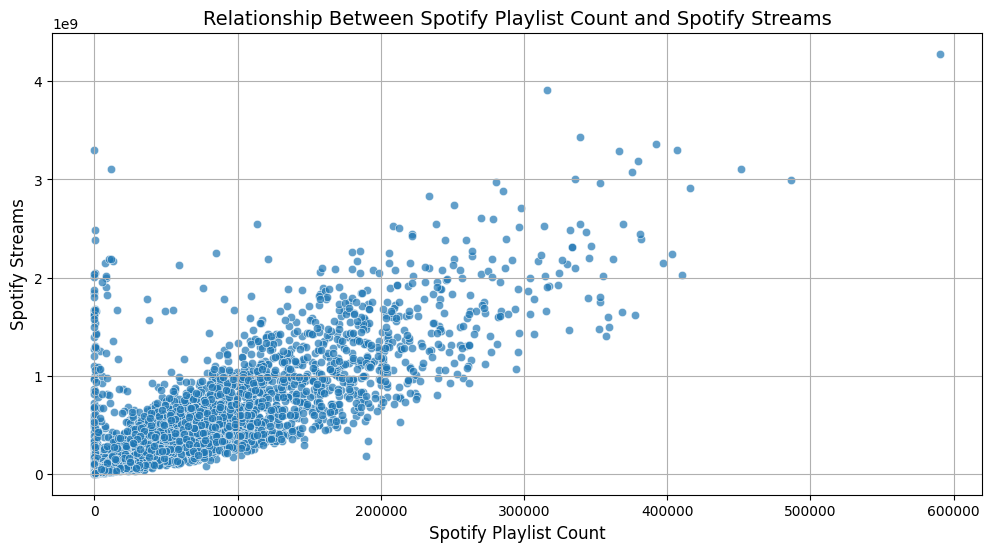

In [ ]:
# Quantitative variables: Spotify Playlist Count and Spotify Streams
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Spotify Playlist Count', y='Spotify Streams', alpha=0.7)
plt.title('Relationship Between Spotify Playlist Count and Spotify Streams', fontsize=14)
plt.xlabel('Spotify Playlist Count', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)
plt.grid(True)
plt.show()

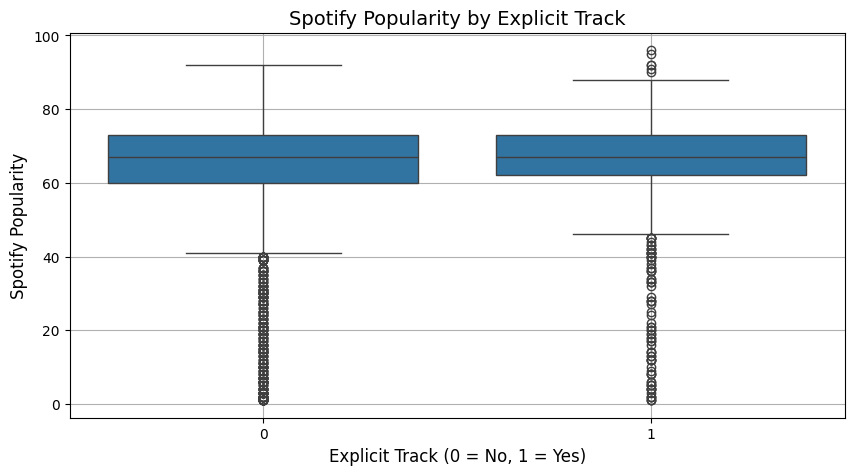

In [ ]:
# Categorical variables: Explicit Track and Spotify Popularity
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Explicit Track', y='Spotify Popularity')
plt.title('Spotify Popularity by Explicit Track', fontsize=14)
plt.xlabel('Explicit Track (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Spotify Popularity', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-15-3ede16998f70>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')


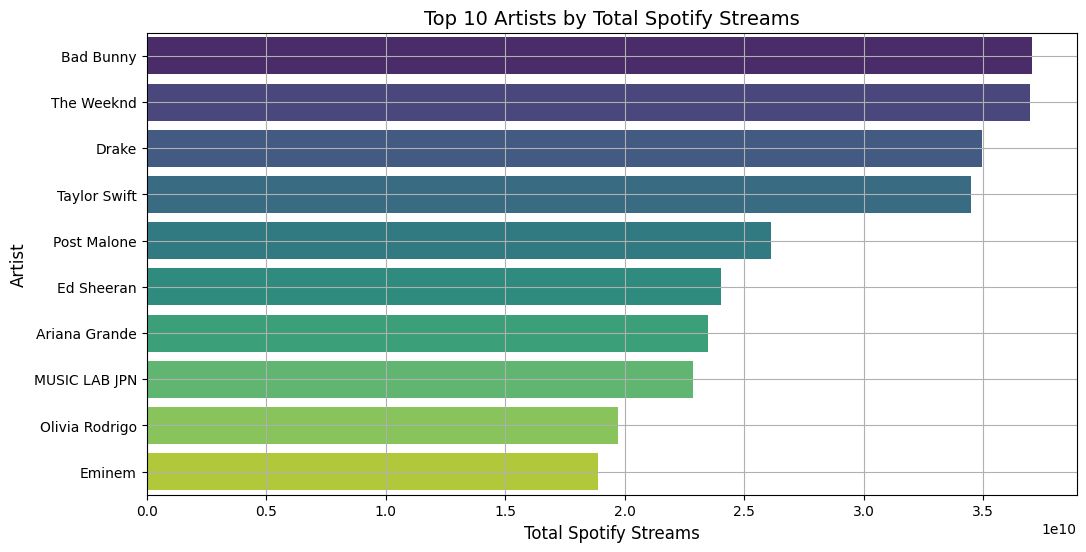

In [ ]:
# Categorical variables: Artist and Spotify Streams (Top 10 Artists)
top_artists = (
    df.groupby('Artist')['Spotify Streams']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_artists, x='Spotify Streams', y='Artist', palette='viridis')
plt.title('Top 10 Artists by Total Spotify Streams', fontsize=14)
plt.xlabel('Total Spotify Streams', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.grid(True)
plt.show()


Observations from Visualizations:
1. TikTok Views vs. Spotify Streams:
  ##### Trend: There's a ?? relationship between TikTok Views and Spotify Streams.
  ##### Relevance: This visualization supports the research question by highlighting TikTok's influence on Spotify performance. It suggests further analysis could quantify the strength of this relationship.


2. Spotify Playlist Count vs. Spotify Streams:

  ##### Trend: A strong positive relationship exists between the number of Spotify Playlists featuring a track and its total streams. Tracks in more playlists naturally receive more exposure and streams.
  ##### Relevance: While not directly linked to TikTok, this highlights another mechanism of popularity on Spotify. Combined with TikTok data, it could reveal whether TikTok boosts playlist inclusion and subsequent streams.


3. Spotify Popularity by Explicit Track:

  ##### Trend: Non-explicit tracks (Explicit Track = 0) have a wider range and slightly higher median popularity scores than explicit tracks. This could reflect broader audience appeal for family-friendly tracks.
  ##### Relevance: While not the primary focus, this suggests explicit content might limit a track's reach or appeal, providing additional context to trends across platforms.


4. Top 10 Artists by Total Spotify Streams:

  ##### Trend: A small number of artists dominate Spotify streams, with these top 10 collectively contributing a substantial portion. These artists may also have significant TikTok presence.
  ##### Relevance: Identifying these artists helps explore whether their dominance extends to TikTok and whether viral trends disproportionately favor them.